In [1]:
from sklearn.datasets import load_digits as load_data
digits = load_data()

In [2]:
from keras.datasets import fashion_mnist

train, test = fashion_mnist.load_data()

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

train_images, train_labels = train
test_images, test_labels = test

2024-10-26 09:00:59.791172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-26 09:01:01.670371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import numpy as np

X = np.array(list(map(lambda image: image.flatten(), train_images)))

In [4]:
examples_count, feature_count = X.shape
class_count = len(set(train_labels))

In [5]:
one_hot_encoding = map(lambda i: np.array([1 if i == j else 0 for j in range(class_count)]), train_labels)
y = np.array(list(one_hot_encoding))

In [6]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

In [7]:
def forward(X, current_parameters):
    return softmax(X @ current_parameters)

def backward(X, y_true, y_pred):
    n_samples = X.shape[0]
    
    # Compute the gradient
    grad = (1 / n_samples) * (X.T @ (y_pred - y_true))
    
    return grad

In [8]:
def logistic_loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    return loss

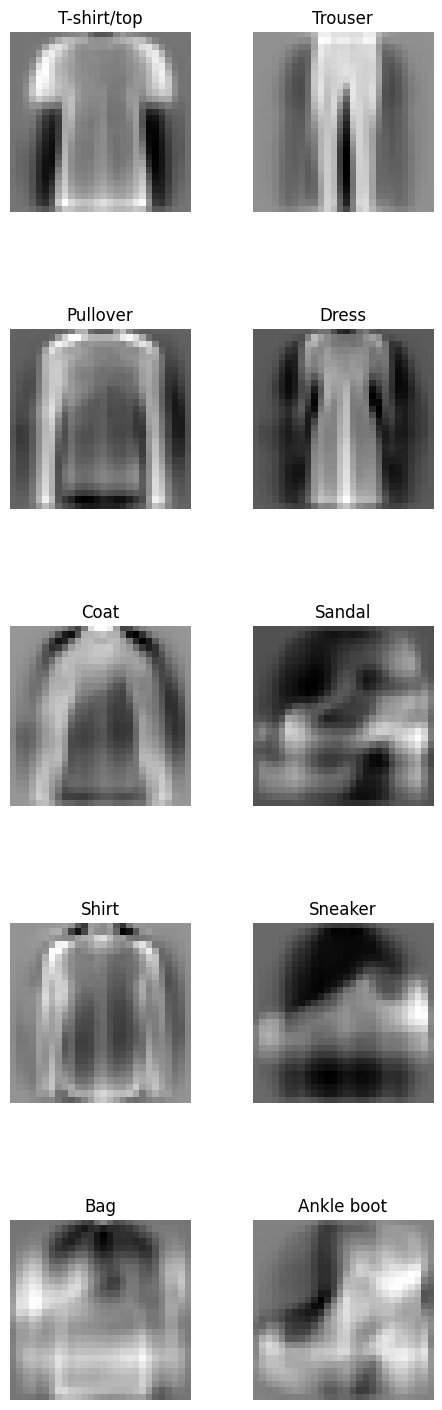

Epoch 0, loss: 4.319421
Epoch 1, loss: 5.102302
Epoch 2, loss: 5.066168
Epoch 3, loss: 5.710727
Epoch 4, loss: 4.981843
Epoch 5, loss: 4.337733
Epoch 6, loss: 5.060909
Epoch 7, loss: 5.662101
Epoch 8, loss: 3.994198
Epoch 9, loss: 5.257602
Epoch 10, loss: 3.918256
Epoch 11, loss: 3.843710
Epoch 12, loss: 4.072760
Epoch 13, loss: 3.979484
Epoch 14, loss: 3.782438
Epoch 15, loss: 3.249319
Epoch 16, loss: 3.161128
Epoch 17, loss: 2.743807
Epoch 18, loss: 3.409116
Epoch 19, loss: 3.255973
Epoch 20, loss: 2.686081
Epoch 21, loss: 2.672900
Epoch 22, loss: 2.624172
Epoch 23, loss: 2.575145
Epoch 24, loss: 2.186682
Epoch 25, loss: 2.415721
Epoch 26, loss: 2.011281
Epoch 27, loss: 2.294947
Epoch 28, loss: 2.901614
Epoch 29, loss: 3.110422
Epoch 30, loss: 2.566293


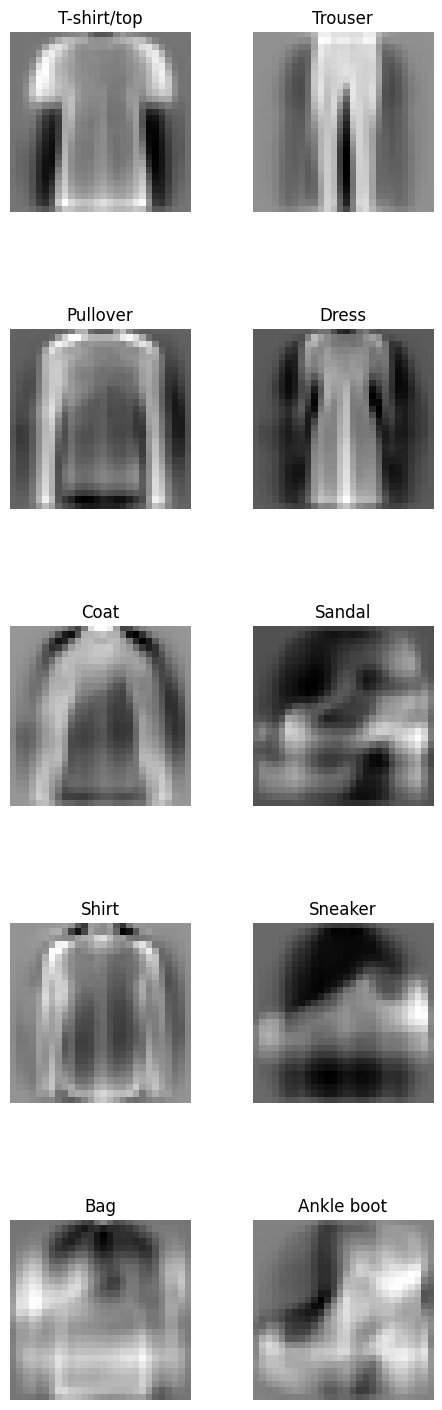

In [11]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython import display
from io import BytesIO

np.random.seed(42)
current_parameters = np.random.randn(feature_count, class_count) * 1e-2

epochs = 30
lr = 0.1

fig, axes = plt.subplots(5, 2, figsize=(5, 15))
fig.tight_layout()

dh = display.display(fig, display_id=True)

frame_buffers = []

for epoch in range(epochs + 1):
    reshaped_matrices = [current_parameters[:, i].reshape(28, 28) for i in range(current_parameters.shape[1])]

    num_matrices = len(reshaped_matrices)

    for i, ax in enumerate(axes.flat):
        if i < num_matrices:
            ax.imshow(reshaped_matrices[i], cmap='gray')  # Display each 16x16 matrix as an image
            ax.set_title(f'{class_names[i]}')  # Label with index
        ax.axis('off')  # Hide axes for a cleaner look

    dh.update(fig)

    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    frame_buffers.append(buf)

    y_pred = forward(X, current_parameters)
    loss = logistic_loss(y, y_pred)
    tqdm.write(f'Epoch {epoch}, loss: {loss:.6f}')
    gradient = backward(X, y, y_pred)
    current_parameters -= lr * gradient

In [12]:
from sklearn.metrics import classification_report

y_pred = forward(X, current_parameters)
y_pred = np.array(list(map(lambda probs: np.argmax(probs), y_pred)))
print(classification_report(train_labels, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5561    0.8915    0.6849      6000
           1     0.9444    0.9255    0.9348      6000
           2     0.8040    0.2215    0.3473      6000
           3     0.6682    0.8735    0.7572      6000
           4     0.5133    0.0128    0.0250      6000
           5     0.8578    0.6805    0.7589      6000
           6     0.9930    0.0237    0.0462      6000
           7     0.8650    0.7617    0.8101      6000
           8     0.9083    0.6518    0.7590      6000
           9     0.2837    0.9628    0.4383      6000

    accuracy                         0.6005     60000
   macro avg     0.7394    0.6005    0.5562     60000
weighted avg     0.7394    0.6005    0.5562     60000



In [ ]:
from utils.plot_training import save_animation

save_animation(frame_buffers, 'softmax_regression_patterns')